In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [18]:
df=pd.read_csv("Titanic-Dataset.csv")

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df = df.drop(columns='Cabin').dropna(subset=['Embarked'])


In [25]:
df['Age'] = df['Age'].round()

df['Pclass'] = df['Pclass'].map({1:'Upper', 2:'Middle', 3:'Lower'})

df['Embarked'] = df['Embarked'].map({1:'Upper', 2:'Middle', 3:'Lower'})

df['Survived'] = df['Survived'].map({0:'Survived', 1:'Not Survived'})

df['Sex'] = df['Sex'].str.title()

categorical_columns = ['Sex', 'Parch', 'SibSp', 'Pclass', 'Embarked', 'Survived']
df[categorical_columns] = df[categorical_columns].astype('category')

In [26]:
cols = [
    'Name', 'Sex', 'Age', 'Parch', 'SibSp',
    'Ticket', 'Pclass', 'Embarked', 'Fare',
    'Survived'
]

df = df[cols]
df

,Name,Sex,Age,Parch,SibSp,Ticket,Pclass,Embarked,Fare,Survived
0,"Braund, Mr. Owen Harris",Male,22.0,0,1,A/5 21171,Lower,NaN,7.2500,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,0,1,PC 17599,Upper,NaN,71.2833,Not Survived
2,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,Lower,NaN,7.9250,Not Survived
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,0,1,113803,Upper,NaN,53.1000,Not Survived
4,"Allen, Mr. William Henry",Male,35.0,0,0,373450,Lower,NaN,8.0500,Survived
...,...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",Male,27.0,0,0,211536,Middle,NaN,13.0000,Survived
887,"Graham, Miss. Margaret Edith",Female,19.0,0,0,112053,Upper,NaN,30.0000,Not Survived
888,"Johnston, Miss. Catherine Helen ""Carrie""",Female,NaN,2,1,W./C. 6607,Lower,NaN,23.4500,Survived
889,"Behr, Mr. Karl Howell",Male,26.0,0,0,111369,Upper,NaN,30.0000,Not Survived


In [27]:
df.head()

,Name,Sex,Age,Parch,SibSp,Ticket,Pclass,Embarked,Fare,Survived
0,"Braund, Mr. Owen Harris",Male,22.0,0,1,A/5 21171,Lower,NaN,7.2500,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,0,1,PC 17599,Upper,NaN,71.2833,Not Survived
2,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,Lower,NaN,7.9250,Not Survived
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,0,1,113803,Upper,NaN,53.1000,Not Survived
4,"Allen, Mr. William Henry",Male,35.0,0,0,373450,Lower,NaN,8.0500,Survived


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      0 non-null      object  
 1   Sex       0 non-null      category
 2   Age       0 non-null      float64 
 3   Parch     0 non-null      category
 4   SibSp     0 non-null      category
 5   Ticket    0 non-null      object  
 6   Pclass    0 non-null      category
 7   Embarked  0 non-null      category
 8   Fare      0 non-null      float64 
 9   Survived  0 non-null      category
dtypes: category(6), float64(2), object(2)
memory usage: 1.2+ KB


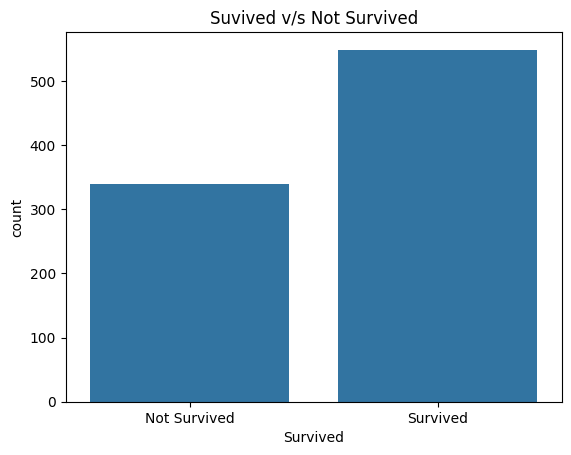

In [29]:
sb.countplot(data=df, x='Survived')

plt.title('Suvived v/s Not Survived')
plt.show();

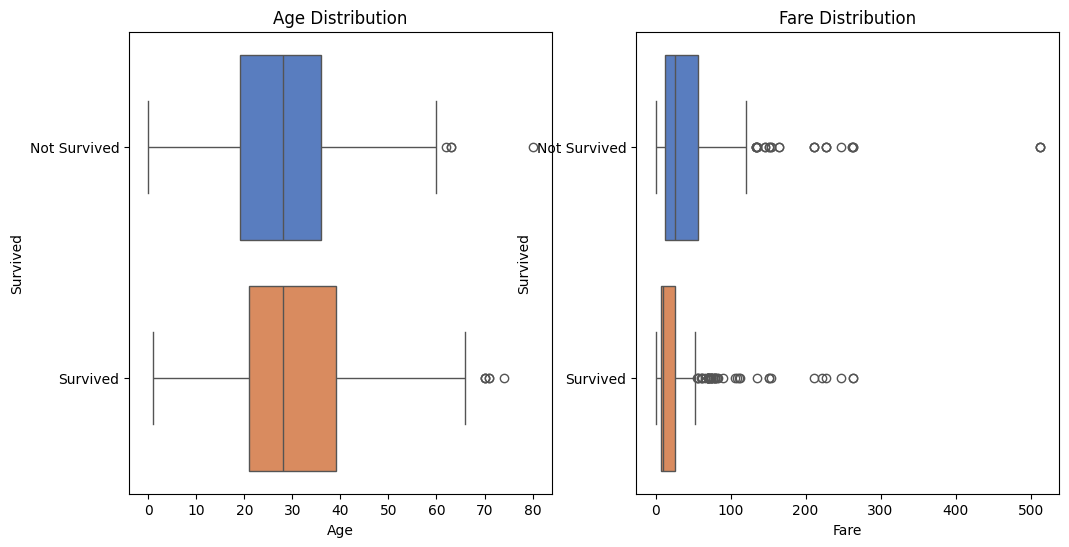

In [34]:
import seaborn as sb
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sb.boxplot(data=df, x='Age', y='Survived', hue='Survived', ax=ax1, palette='muted', legend=False)
ax1.set_title("Age Distribution")
sb.boxplot(data=df, x='Fare', y='Survived', hue='Survived', ax=ax2, palette='muted', legend=False)
ax2.set_title("Fare Distribution")
plt.show()


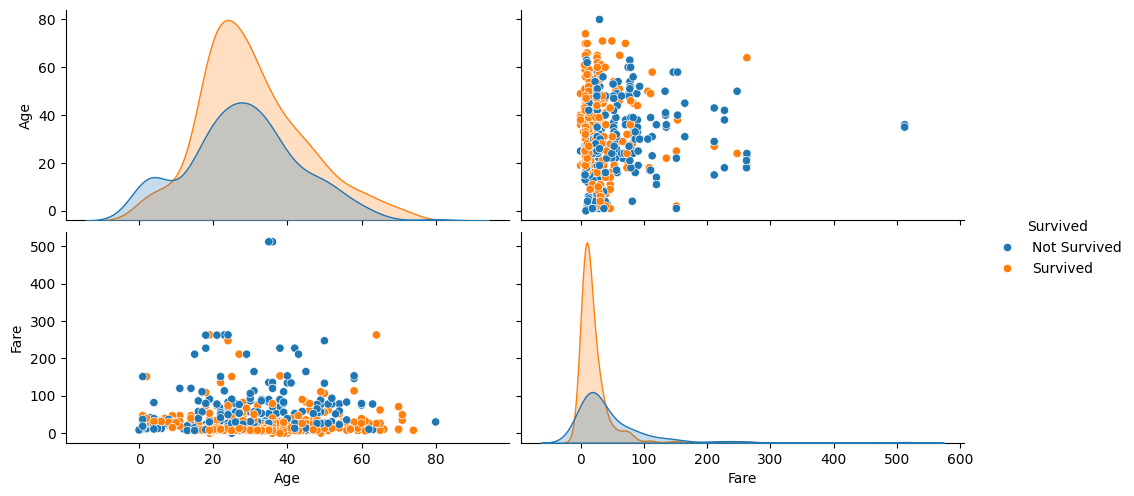

In [35]:
sb.pairplot(data=df, hue='Survived', aspect=2);

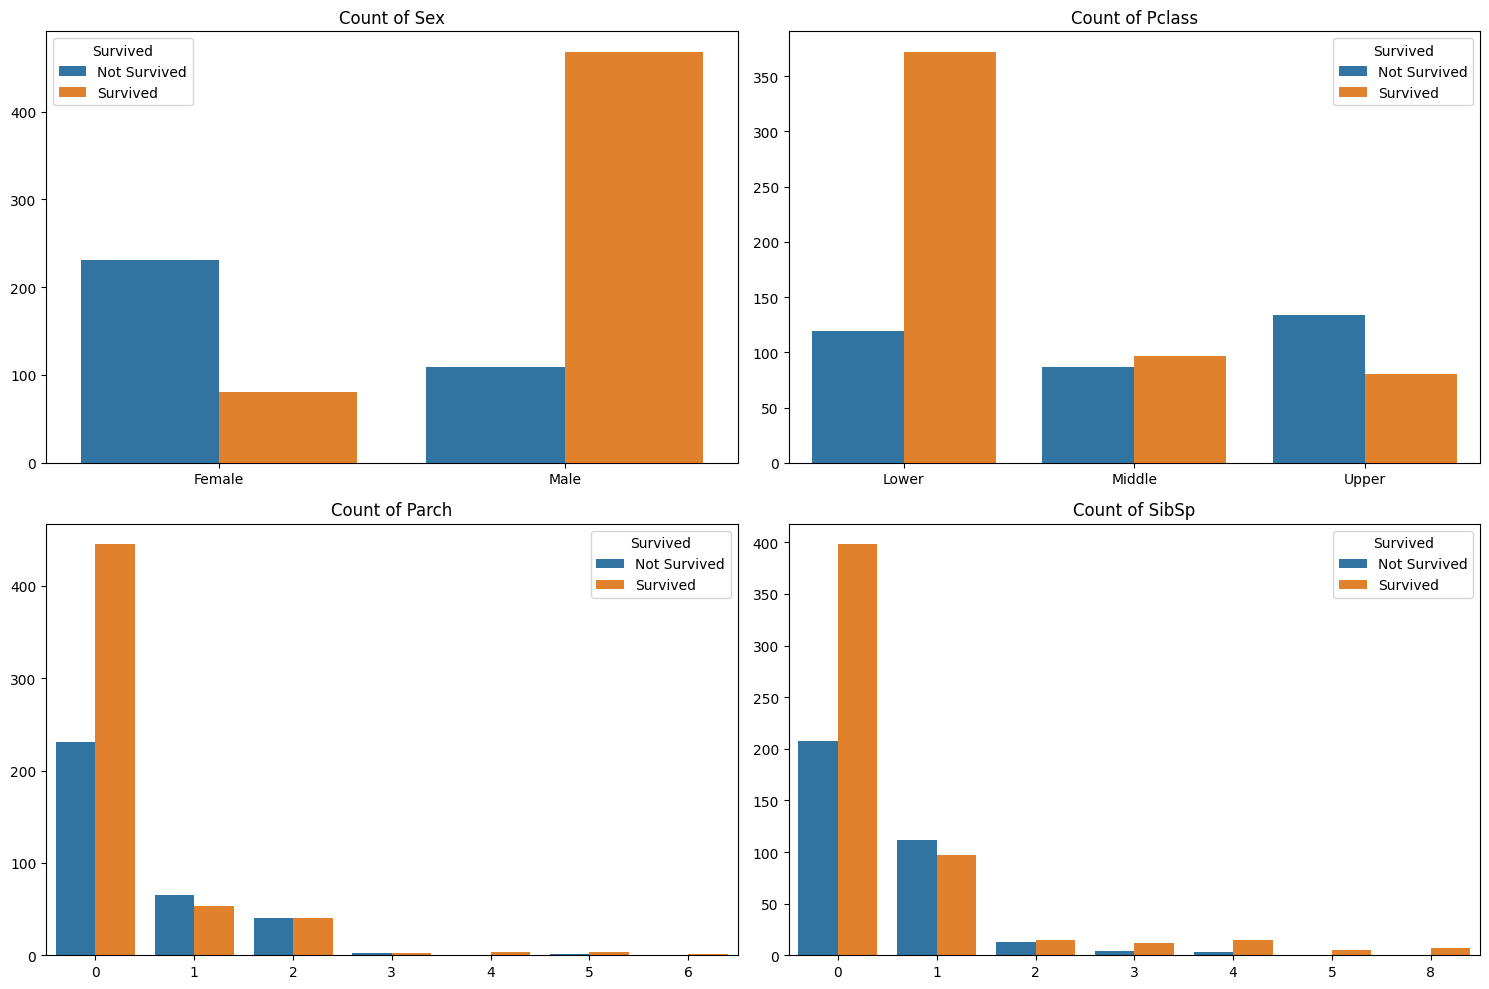

In [44]:


cat_cols = ['Sex', 'Pclass', 'Parch', 'SibSp']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for feature, ax in zip(cat_cols, axes.flatten()):
    sb.countplot(data=df, x=feature, hue='Survived', ax=ax)
    ax.set_title(f'Count of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


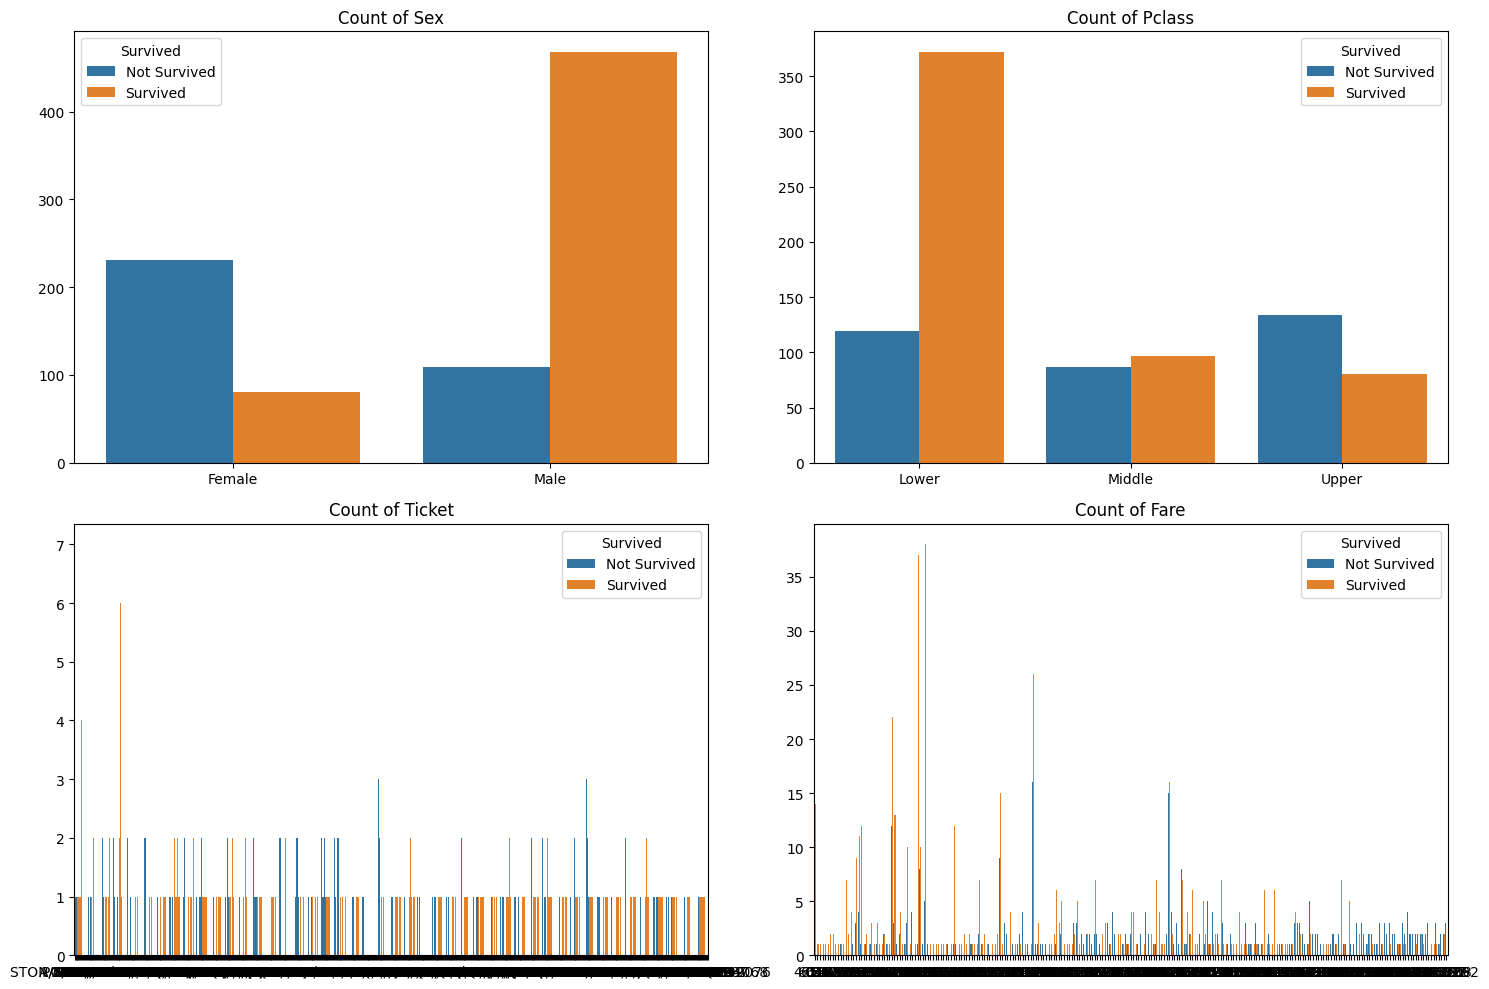

In [45]:
cat_cols = ['Sex', 'Pclass', 'Ticket', 'Fare']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for feature, ax in zip(cat_cols, axes.flatten()):
    sb.countplot(data=df, x=feature, hue='Survived', ax=ax)
    ax.set_title(f'Count of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()